
### Hand Gesture Classification Based on EMG signals
##### By:
##### Jialin Song J.Song-9@student.tudelft.nl 5923859
##### Anieze Ikedionwu  a.g.ikedionwu@student.tudelft.nl 5928273

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [2]:
# read feature data
df = pd.read_csv('emg_feature.csv')

In [3]:
#extract features and class
X_1 = df[['RMS1','VAR1','MAV1','SSC1','WL1','RMS2','VAR2','MAV2','SSC2','WL2','RMS3','VAR3','MAV3','SSC3','WL3','RMS4','VAR4','MAV4','SSC4','WL4','RMS5','VAR5','MAV5','SSC5','WL5','RMS6','VAR6','MAV6','SSC6','WL6','RMS7','VAR7','MAV7','SSC7','WL7','RMS8','VAR8','MAV8','SSC8','WL8']]
y = df['class']

In [4]:
#Correlation matrix
corrMatrix = X_1.corr();

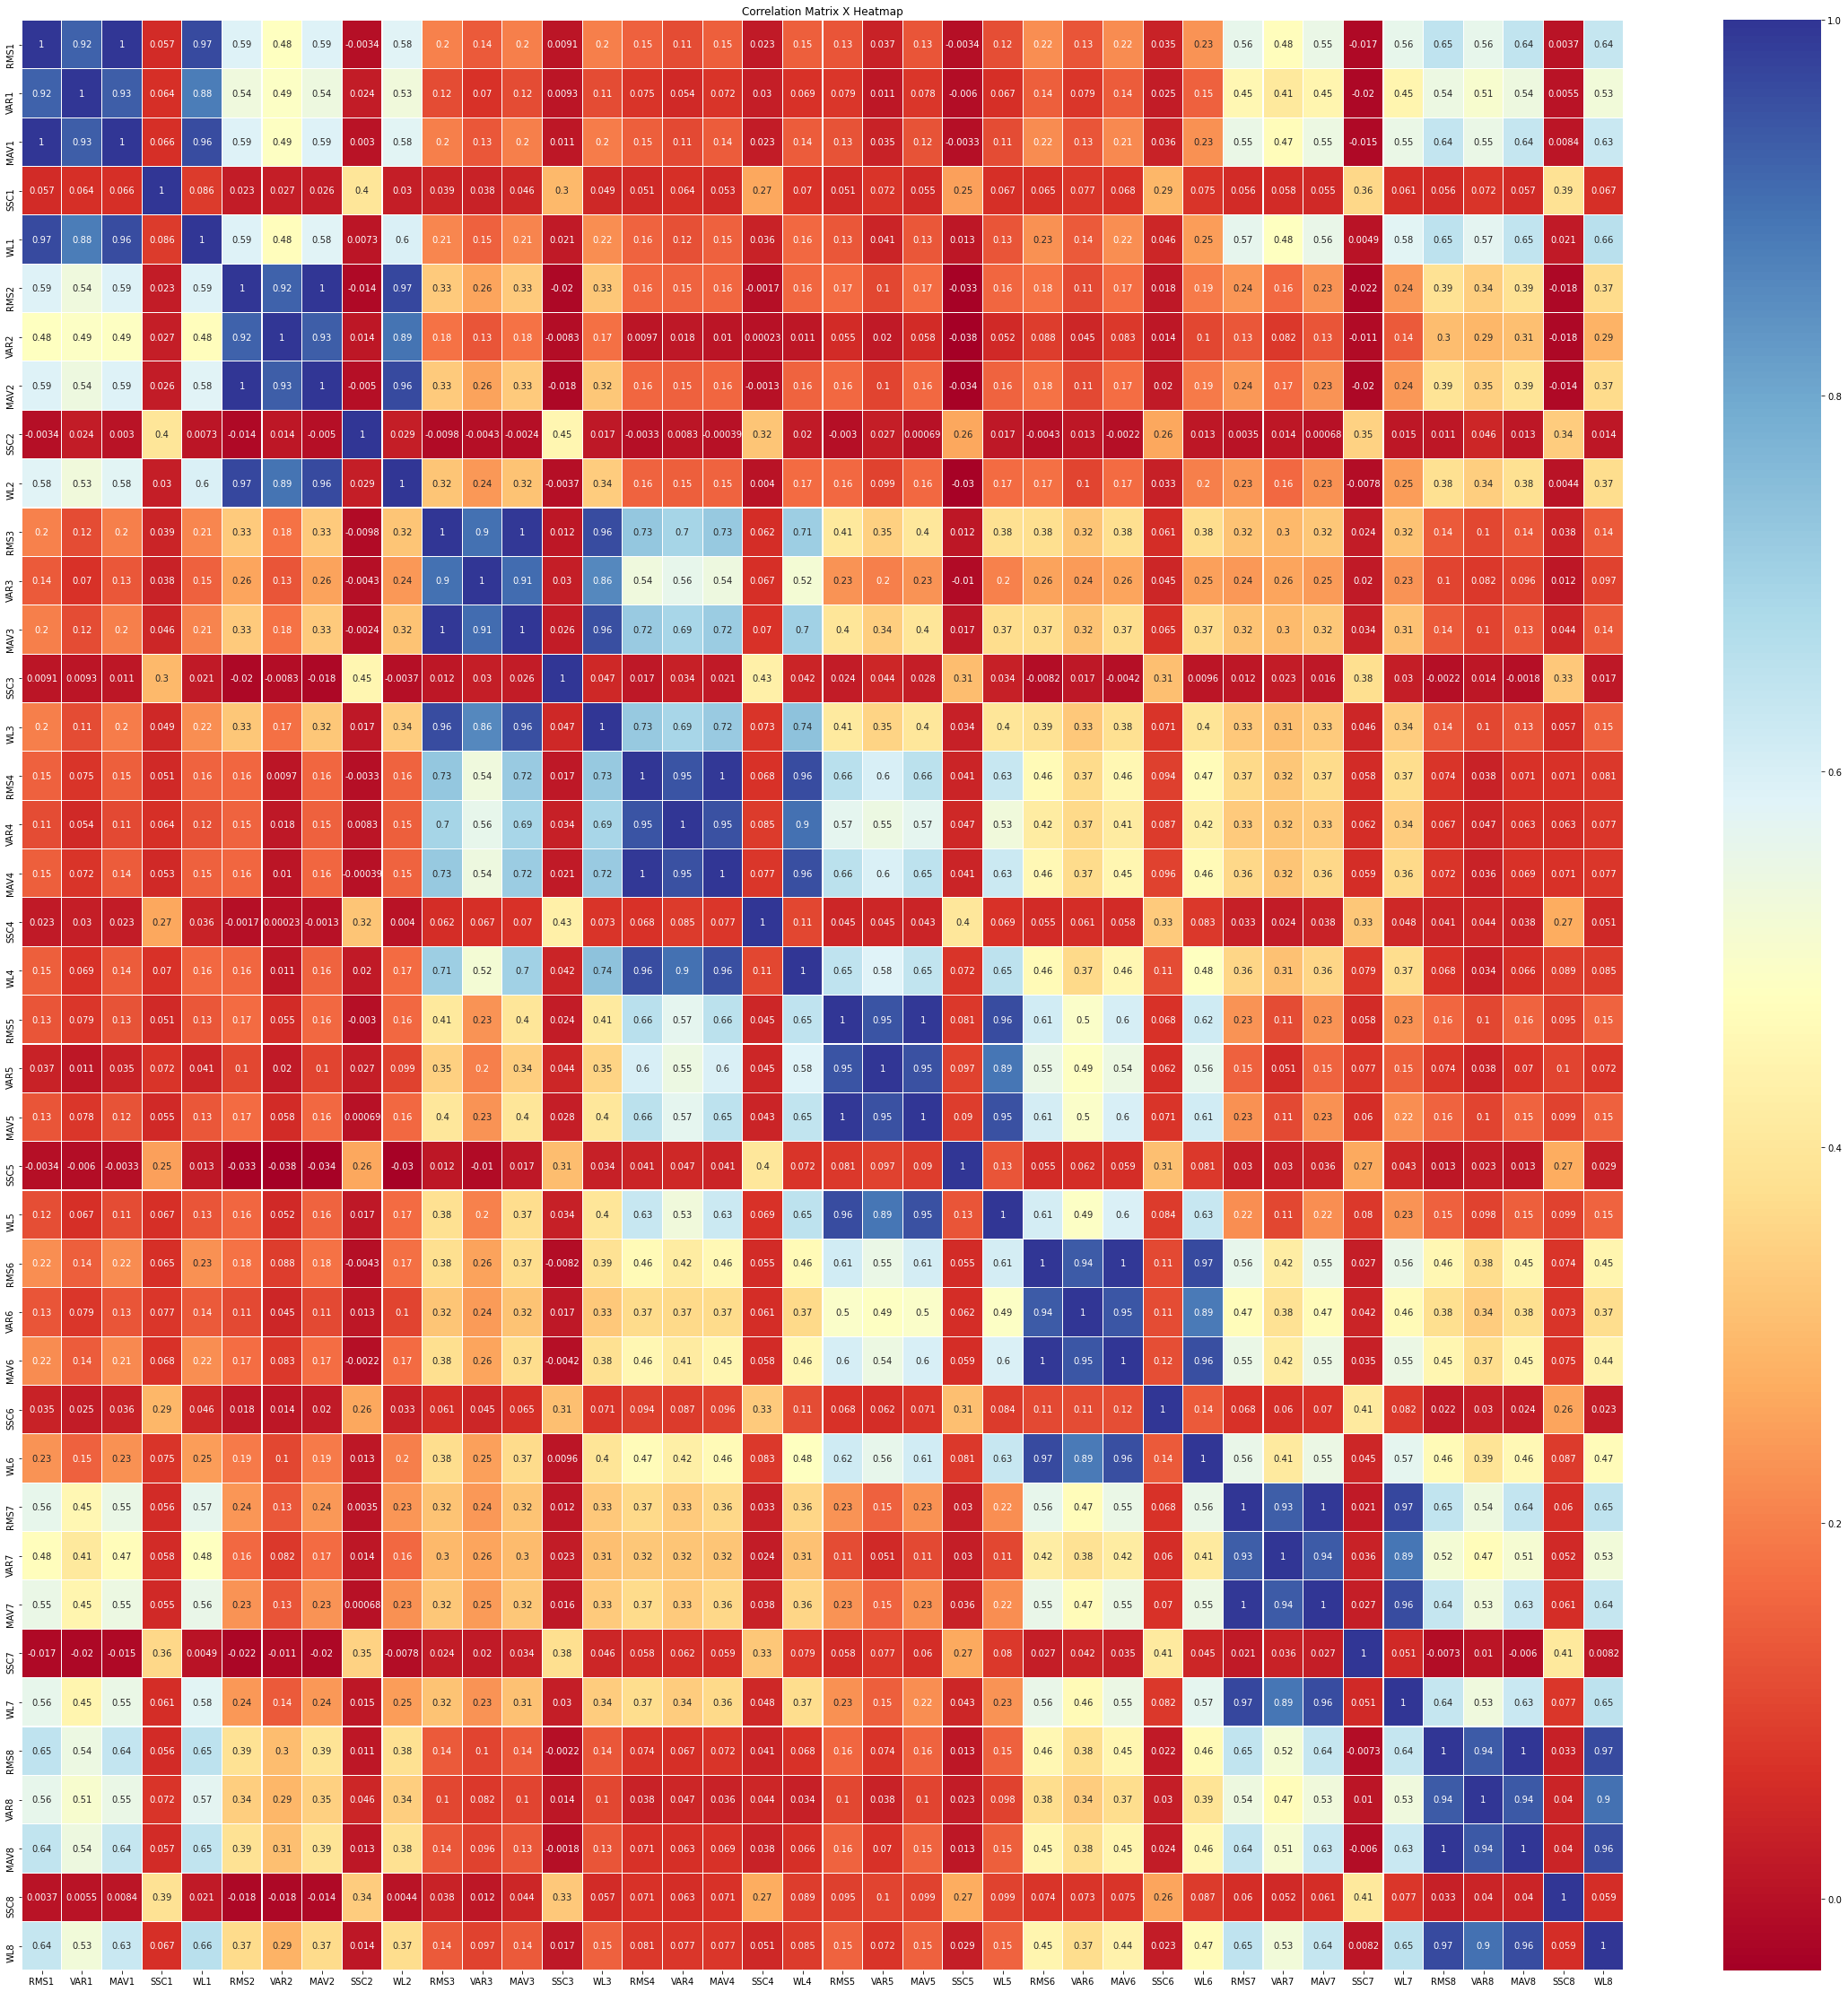

In [5]:
#Heatmap of correlation matrix X
plt.figure(figsize=(40, 40))  
sn.heatmap(corrMatrix, annot=True, cmap='RdYlBu', linewidths = 0.1)
plt.title('Correlation Matrix X Heatmap')
plt.show()

In [6]:
#selected features
X = df[['RMS1','SSC1','RMS2','SSC2','RMS3','SSC3','RMS4','SSC4','RMS5','SSC5','RMS6','SSC6','RMS7','SSC7','RMS8','SSC8']]

In [7]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#ratio of each class
print((np.sum(y==1)/len(y))*100)
print((np.sum(y==2)/len(y))*100)
print((np.sum(y==3)/len(y))*100)
print((np.sum(y==4)/len(y))*100)
print((np.sum(y==5)/len(y))*100)
print((np.sum(y==6)/len(y))*100)
print((np.sum(y==7)/len(y))*100)

18.034825870646767
17.495854063018243
17.86898839137645
18.076285240464347
18.13847429519071
9.888059701492537
0.4975124378109453


In [9]:
#train-test split keeping ratio of each training class equal
Shuffle_state = 4720
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25,random_state=4720,stratify = y) 

In [10]:
#ratio of each training class
print(np.sum(y_train==1)/np.sum(y==1))
print(np.sum(y_train==2)/np.sum(y==2))
print(np.sum(y_train==3)/np.sum(y==3))
print(np.sum(y_train==4)/np.sum(y==4))
print(np.sum(y_train==5)/np.sum(y==5))
print(np.sum(y_train==6)/np.sum(y==6))
print(np.sum(y_train==7)/np.sum(y==7))

0.7505747126436781
0.75
0.7494199535962877
0.75
0.7497142857142857
0.750524109014675
0.75


### TASK 2: CLASSIFICATION MODELS

In [11]:
#model evaluation function
def model_evaluation(y_test,y_prediction):
    Accuracy = accuracy_score(y_test, y_prediction)
    F1 = f1_score(y_test, y_prediction,average = 'macro')
    Precision = precision_score(y_test, y_prediction,average = 'macro')
    Recall = recall_score(y_test, y_prediction,average = 'macro')
    print("Accuracy: " + str(Accuracy))
    print("F1 score: " + str(F1))
    print("Recall score: " + str(Recall))
    print("Precision score: " + str(Precision))
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(8, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [12]:
#parameters for grid search for SVM
svm_param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.01, 0.1, 1,10,100]}

In [13]:
#Hyperparameter tuning for SVM using gridsearch
svc = SVC()
svc_grid = GridSearchCV(svc, svm_param_grid,cv=5)
svc_grid.fit(X_train, y_train)
best_svc_params = svc_grid.best_params_
best_svc = svc_grid.best_estimator_

In [14]:
#Best SVC parameter from the grid search
print('{}:{}'.format(best_svc_params,best_svc))

{'C': 100, 'kernel': 'rbf'}:SVC(C=100)


In [15]:
#SVM model training for ovo
clf_svm = SVC(C=100, kernel='rbf',decision_function_shape='ovo',probability = True)
clf_svm.fit(X_train, y_train)
y_prediction_svm = clf_svm.predict(X_test)

Accuracy: 0.9850746268656716
F1 score: 0.9733541027933634
Recall score: 0.9633806820413069
Precision score: 0.9855278016734678


<Figure size 576x360 with 0 Axes>

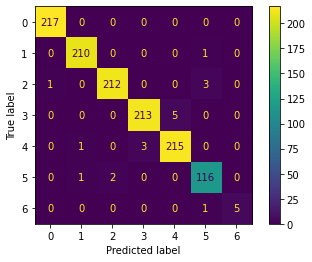

In [16]:
#SVM model evaluation for ovo
model_evaluation(y_test,y_prediction_svm)

In [17]:
#SVM model training using ovr
clf_svm2 = SVC(C=100, kernel='rbf',decision_function_shape='ovr',probability = True)
clf_svm2.fit(X_train, y_train)
y_prediction_svm2 = clf_svm2.predict(X_test)

Accuracy: 0.9850746268656716
F1 score: 0.9733541027933634
Recall score: 0.9633806820413069
Precision score: 0.9855278016734678


<Figure size 576x360 with 0 Axes>

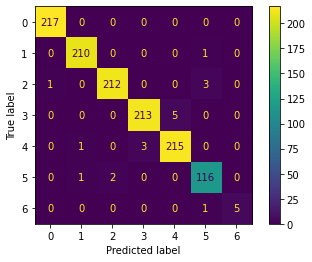

In [18]:
#SVM model evaluation for ovr
model_evaluation(y_test,y_prediction_svm2)

In [19]:
#parameters for grid search for Logistic Regression
LR_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'multi_class' : ['ovr', 'multinomial']}

In [20]:
#Hyperparameter tuning for LR using gridsearch
LR = LogisticRegression(max_iter = 1000)
LR_grid = GridSearchCV(LR, LR_param_grid,cv=5)
LR_grid.fit(X_train, y_train)
best_LR_params = LR_grid.best_params_
best_LR = LR_grid.best_estimator_

In [21]:
#Best LR parameter from the grid search
print('{}'.format(best_LR_params))

{'C': 10, 'multi_class': 'multinomial'}


In [22]:
#LR model training
clf_lr = LogisticRegression(C = 10, multi_class = 'multinomial',max_iter = 1000)
clf_lr.fit(X_train, y_train)
y_prediction_lr = clf_lr.predict(X_test)

Accuracy: 0.851575456053068
F1 score: 0.8224543851119707
Recall score: 0.8118006337874091
Precision score: 0.836763363448524


<Figure size 576x360 with 0 Axes>

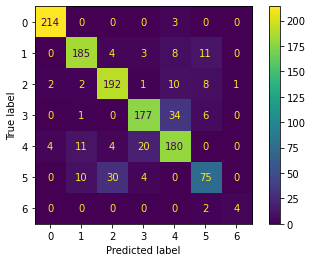

In [23]:
#LR model evaluation
model_evaluation(y_test,y_prediction_lr)

In [24]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50],'min_samples_split': randint(1, 30), 'min_samples_leaf': randint(1, 30)}

In [25]:
#Random search for hyperparameter tuning for random forest
RF = RandomForestClassifier(random_state=42)
RF_grid = RandomizedSearchCV(estimator = RF, param_distributions = RF_param_grid, cv=5, random_state=42)
RF_grid.fit(X_train, y_train)
best_RF_params = RF_grid.best_params_
best_RF = RF_grid.best_estimator_

In [26]:
#Best hyperparameter from the random forest
print('{}'.format(best_RF_params))

{'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 300}


In [27]:
#RF model training
clf_RF = RandomForestClassifier(n_estimators = 300, random_state=42, max_depth = 50,min_samples_leaf = 4,min_samples_split= 8)
clf_RF.fit(X_train, y_train)
y_prediction_RF = clf_RF.predict(X_test)

Accuracy: 0.9734660033167496
F1 score: 0.9474136473124789
Recall score: 0.9283437021551783
Precision score: 0.9761618282444282


<Figure size 576x360 with 0 Axes>

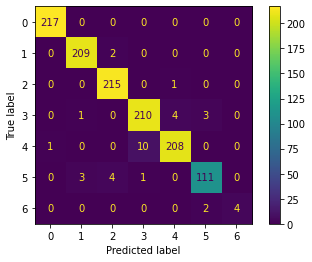

In [28]:
#RF model evaluation
model_evaluation(y_test,y_prediction_RF)

#### Deep Learning model

In [70]:
#hyperparameters for the mlp
mlp_param_grid = {'hidden_layer_sizes': [(50,50), (50,50,50),(50,50,50,50),(50,50,50,50,50)], 'alpha': [0.0001, 0.001, 0.01], 'activation': ['relu', 'tanh'],'solver': ['adam', 'sgd'], 'max_iter': [300, 400, 500]}

In [71]:
#Random search for hyperparameter tuning for mlp
mlp_classifier = MLPClassifier(random_state=42)
mlp_grid = RandomizedSearchCV(estimator = mlp_classifier, param_distributions = mlp_param_grid, cv=5, random_state=42)
mlp_grid.fit(X_train, y_train)
best_mlp_params = mlp_grid.best_params_
best_mlp = mlp_grid.best_estimator_

C:\Users\aniez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aniez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aniez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aniez\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aniez\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [72]:
print('{}:{}'.format(best_mlp_params,best_mlp))

{'solver': 'adam', 'max_iter': 500, 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}:MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50), max_iter=500,
              random_state=42)


In [73]:
#mlp training
mlp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50, 50, 50),solver = 'adam',activation = 'tanh',max_iter= 500, random_state = 42)
mlp.fit(X_train, y_train)
y_prediction_mlp = mlp.predict(X_test)

Accuracy: 0.9875621890547264
F1 score: 0.9881909248775319
Recall score: 0.9879429695079379
Precision score: 0.9884925525764638


<Figure size 576x360 with 0 Axes>

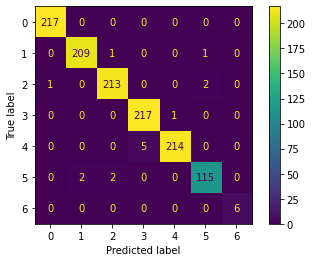

In [74]:
#MLP model evaluation
model_evaluation(y_test,y_prediction_mlp)

### TASK 3: ENSEMBLE MODEL

In [75]:
#stacking classifier for ensembling all the used models
from sklearn.ensemble import StackingClassifier

In [76]:
#base estimators
base_estimators = [('svc', clf_svm),('lr', clf_lr),('mlp', mlp),('rf', clf_RF)]

In [80]:
#stacking training
stacking_ensemble = StackingClassifier(estimators=base_estimators)
stacking_ensemble.fit(X_train, y_train)
y_prediction_ensemble = stacking_ensemble.predict(X_test)

Accuracy: 0.9900497512437811
F1 score: 0.9778520598983951
Recall score: 0.9678825176754963
Precision score: 0.9900131674864427


<Figure size 576x360 with 0 Axes>

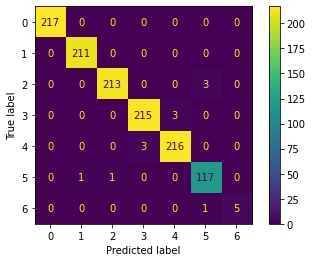

In [81]:
#model evaluation of the ensembling done
model_evaluation(y_test,y_prediction_ensemble)